In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

## Parallel fiber - GoC

In [2]:
output_path =  Path('../../test_data/connection_output/')

adend = np.loadtxt(output_path / 'GoCadendcoordinates.dat')
bdend = np.loadtxt(output_path / 'GoCbdendcoordinates.dat')
gocs = np.loadtxt(output_path / "GoCcoordinates.sorted.dat")

adend = adend.reshape((1995,50,3))
bdend = bdend.reshape((1995,24,3))

gocx = gocs[:, 0]
gocy = gocs[:, 1]

In [3]:
# ii = (gocx<600)*(gocx>300)*(gocy>300)*(gocy<600)
# ii, = np.where(ii)
# ii = np.random.choice(ii, 4)
ii = np.array([ 341,  477,  939, 1432])

Here we check if the dendritic point alignment is ok.

In [4]:
draw_dend = lambda ax, x, y, z, c: ax.plot(x, y, z, '-', linewidth=2.5, c=c)
draw_apic = lambda ax, x, y, z: draw_dend(ax, x, y, z, 'c')
draw_basal = lambda ax, x, y, z: draw_dend(ax, x, y, z, 'm')
draw_dendpts = lambda ax, x, y, z, s: ax.plot(x, y, z, '.k', markersize=s)
draw_apicpts = lambda ax, x, y, z: draw_dendpts(ax, x, y, z, 2)
draw_basalpts = lambda ax, x, y, z: draw_dendpts(ax, x, y, z, 1)

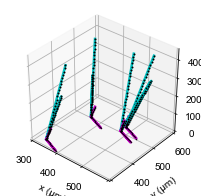

In [5]:
plt.close('all')
fig = plt.figure(figsize=(8.5/2.54, 8.5/2.54))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-50, elev=35)

def draw1(ax, adend, bdend, i):
       x, y, z = adend[i][:,0], adend[i][:,1], adend[i][:,2]
       draw_apic(ax, x, y, z)
       x, y, z = bdend[i][:,0], bdend[i][:,1], bdend[i][:,2]
       draw_basal(ax, x, y, z)

def draw1pts(ax, adend, bdend, i):
       x, y, z = adend[i][:,0], adend[i][:,1], adend[i][:,2]
       draw_apicpts(ax, x, y, z)
       x, y, z = bdend[i][:,0], bdend[i][:,1], bdend[i][:,2]
       draw_basalpts(ax, x, y, z)

for i in ii:
       draw1(ax, adend, bdend, i)
       draw1pts(ax, adend, bdend, i)

ax.set(xlabel='x (μm)', ylabel='y (μm)', zlabel='z (μm)',
       xlim=[300, 600], ylim=[300, 600], zlim=[0, 450],
       xticks=np.arange(300, 601, 100), yticks=np.arange(0, 301, 100)+300)
plt.savefig('goc_cloud.jpg', dpi=600)
plt.savefig('goc_cloud.pdf', dpi=600)

Now we check if connections look ok.

In [6]:
grcs = np.loadtxt(output_path / "GCcoordinates.sorted.dat")
gcts = np.loadtxt(output_path / "GCTcoordinates.sorted.dat")

In [7]:
data_index = 12

fcoords = "PFtoGoCcoords{}.dat".format(data_index)
fsrcs = "PFtoGoCsources{}.dat".format(data_index)
ftgts = "PFtoGoCtargets{}.dat".format(data_index)
fdsts = "PFtoGoCdistances{}.dat".format(data_index)

xyz =  np.loadtxt(output_path / fcoords)
srcs = np.loadtxt(output_path / fsrcs).astype(int)
tgts = np.loadtxt(output_path / ftgts).astype(int)
dsts = np.loadtxt(output_path / fdsts)

In [8]:
i = 800
tgt = tgts[i]
src = srcs[i]
dst = dsts[i]

pt2 = xyz[i]

print("{} -> {} with d = {}".format(src, tgt, dst))

399358 -> 200 with d = 470.7740117386885


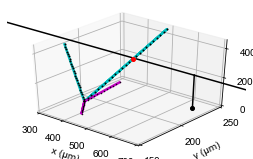

In [9]:
plt.close('all')

fig = plt.figure(figsize=(8.5/2.54*8/5*0.8, 8.5/2.54*0.8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-50, elev=35)

pt0 = grcs[src]
pt1 = gcts[src]
ax.plot([pt0[0]], [pt0[1]], [pt0[2]], 'ok', markersize=4)
ax.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], [pt0[2], pt1[2]], '-k')
ax.plot([pt1[0], pt1[0]+1e3], [pt1[1], pt1[1]], [pt1[2], pt1[2]], '-k')
ax.plot([pt1[0], pt1[0]-1e3], [pt1[1], pt1[1]], [pt1[2], pt1[2]], '-k')
draw1(ax, adend, bdend, tgt)
draw1pts(ax, adend, bdend, tgt)


pt2 = xyz[i]
ax.plot([pt2[0]], [pt2[1]], [pt2[2]], 'or', markersize=4)
ax.set(xlabel='x (μm)', ylabel='y (μm)', zlabel='z (μm)',
       xlim=[300, 700], ylim=[150, 250], zlim=[0, 450],
       xticks=np.arange(300, 701, 100), yticks=np.arange(150, 251, 50), zticks=[0, 200, 400])

plt.savefig('goc_pf.jpg', dpi=600)
plt.savefig('goc_pf.pdf', dpi=600)

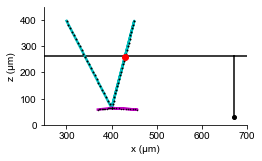

In [10]:
fig, ax = plt.subplots(figsize=(8.5/2.54*8/5*0.7, 8.5/2.54*0.7))

ax.plot([pt0[0], pt1[0]], [pt0[2], pt1[2]], '-k')
ax.plot([pt0[0]], [pt0[2]], 'o-k', markersize=4)
ax.plot([pt1[0], pt1[0]+1e3], [pt1[2], pt1[2]], '-k')
ax.plot([pt1[0], pt1[0]-1e3], [pt1[2], pt1[2]], '-k')
ax.plot(adend[tgt][:,0], adend[tgt][:,2],'-c', linewidth=2.5)
ax.plot(bdend[tgt][:,0], bdend[tgt][:,2],'-m', linewidth=2.5)
ax.plot(adend[tgt][:,0], adend[tgt][:,2],'.k', markersize=2)
ax.plot(bdend[tgt][:,0], bdend[tgt][:,2],'.k', markersize=1)
ax.plot([pt2[0]], [pt2[2]], 'or')
ax.set(xlabel='x (μm)', ylabel='z (μm)',
       xlim=[250, 700], ylim=[0, 450])
plt.tight_layout()
plt.savefig('goc_pf_p.jpg', dpi=600)

## Ascending axon - GoC

In [11]:
data_index = 80

data_dir = output_path
fcoords = "AAtoGoCcoords{}.dat".format(data_index)
fsrcs = "AAtoGoCsources{}.dat".format(data_index)
ftgts = "AAtoGoCtargets{}.dat".format(data_index)
fdsts = "AAtoGoCdistances{}.dat".format(data_index)

xyz = np.loadtxt(data_dir / fcoords)
srcs = np.loadtxt(data_dir / fsrcs).astype(int)
tgts = np.loadtxt(data_dir / ftgts).astype(int)
dsts = np.loadtxt(data_dir / fdsts)

In [12]:
i = 6750
tgt = tgts[i]
src = srcs[i]
dst = dsts[i]

pt2 = xyz[i]

print("{} -> {} with d = {}".format(src, tgt, dst))

210866 -> 1331 with d = 145.33333333333331


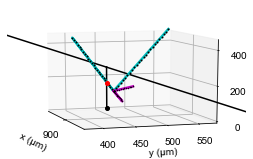

In [13]:
plt.close('all')

fig = plt.figure(figsize=(8.5/2.54*8/5*0.8, 8.5/2.54*0.8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=-18, elev=10)

pt0 = grcs[src]
pt1 = gcts[src]
ax.plot([pt0[0]], [pt0[1]], [pt0[2]], 'ok', markersize=4)
ax.plot([pt0[0], pt1[0]], [pt0[1], pt1[1]], [pt0[2], pt1[2]], '-k')
ax.plot([pt1[0], pt1[0]+1e3], [pt1[1], pt1[1]], [pt1[2], pt1[2]], '-k')
ax.plot([pt1[0], pt1[0]-1e3], [pt1[1], pt1[1]], [pt1[2], pt1[2]], '-k')
draw1(ax, adend, bdend, tgt)
draw1pts(ax, adend, bdend, tgt)


pt2 = xyz[i]
ax.plot([pt2[0]], [pt2[1]], [pt2[2]], 'or', markersize=4)
ax.set(xlabel='x (μm)', ylabel='y (μm)', zlabel='z (μm)',
       xlim=[850, 950], ylim=[375, 575], zlim=[0, 450],
       xticks=np.arange(900, 901, 100), yticks=np.arange(400, 551, 50), zticks=[0, 200, 400])

plt.savefig('goc_aa.jpg', dpi=600)
plt.savefig('goc_aa.pdf', dpi=600)


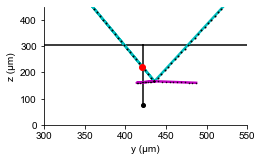

In [14]:
fig, ax = plt.subplots(figsize=(8.5/2.54*8/5*0.7, 8.5/2.54*0.7))

ax.plot([pt0[1], pt1[1]], [pt0[2], pt1[2]], '-k')
ax.plot([pt0[1]], [pt0[2]], 'o-k', markersize=4)

ax.plot([pt1[1], pt1[1]+1e3], [pt1[2], pt1[2]], '-k')
ax.plot([pt1[1], pt1[1]-1e3], [pt1[2], pt1[2]], '-k')
ax.plot(adend[tgt][:,1], adend[tgt][:,2],'-c', linewidth=2.5)
ax.plot(bdend[tgt][:,1], bdend[tgt][:,2],'-m', linewidth=2.5)
ax.plot(adend[tgt][:,1], adend[tgt][:,2],'.k', markersize=2)
ax.plot(bdend[tgt][:,1], bdend[tgt][:,2],'.k', markersize=1)
ax.plot([pt2[1]], [pt2[2]], 'or')
ax.set(xlabel='y (μm)', ylabel='z (μm)',
       xlim=[300, 550], ylim=[0, 450])
plt.tight_layout()
plt.savefig('goc_aa_p.jpg', dpi=600)